In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('quikr_car.csv')

In [3]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


| Column Name  | Description                  |
|--------------|------------------------------|
| name         | Name of the entity           |
| company      | Company associated           |
| year         | Year of manufacture          |
| Price        | Price of the entity          |
| kms_driven   | Distance driven in kilometers|
| fuel_type    | Type of fuel used            |


In [4]:
data.shape

(892, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
data1=data.copy()

**The consistency of the names varies, with some having company names appended. Additionally, certain names exhibit spam-like patterns, such as 'Maruti Ertiga showroom condition with' and 'Well-maintained Tata Sumo'. Regarding the 'company' attribute, numerous entries lack any actual company names, instead containing generic terms like 'Used' and 'URGENT'.**

**The 'year' column encompasses non-year values and is currently formatted as an object; conversion to integer format is needed. The 'Price' field includes instances of 'Ask for Price' and has commas within its numerical values, while the 'kms_driven' column features values stored as objects, with 'kms' mentioned at the end. Additionally, 'kms_driven' includes NaN values, and two rows erroneously have 'Petrol' in this field.**

**The 'fuel_type' attribute contains NaN values, contributing to incomplete information in this column.**

## Cleaning Data 

#### There are numerous non-year values present in the 'year' column.

In [7]:
data=data[data['year'].str.isnumeric()]

#### The 'year' column is currently in object type; it needs to be converted to integer

In [8]:
data['year']=data['year'].astype(int)

#### The 'Price' column includes entries with the value 'Ask for Price'.

In [9]:
data=data[data['Price']!='Ask For Price']

#### The 'Price' column contains commas in its numerical values and is currently formatted as an object.

In [10]:
data['Price']=data['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [11]:
data['kms_driven']=data['kms_driven'].str.split().str.get(0).str.replace(',','')

#### There are NaN values present, and two rows mistakenly have 'Petrol' entries in the respective column.

In [12]:
data=data[data['kms_driven'].str.isnumeric()]

In [13]:
data['kms_driven']=data['kms_driven'].astype(int)

#### fuel_type has nan values

In [14]:
data=data[~data['fuel_type'].isna()]

In [15]:
print("Shape of dataset is: ", data.shape)

Shape of dataset is:  (816, 6)


In [16]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Index Resetting

In [17]:
data=data.reset_index(drop=True)

## Cleaned Data

In [18]:
data.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
5,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [19]:
data.to_csv('Cleaned_Car_data.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [21]:
data.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [22]:
data=data[data['Price']<6000000]

### Checking relationship of Company with Price

In [23]:
data['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

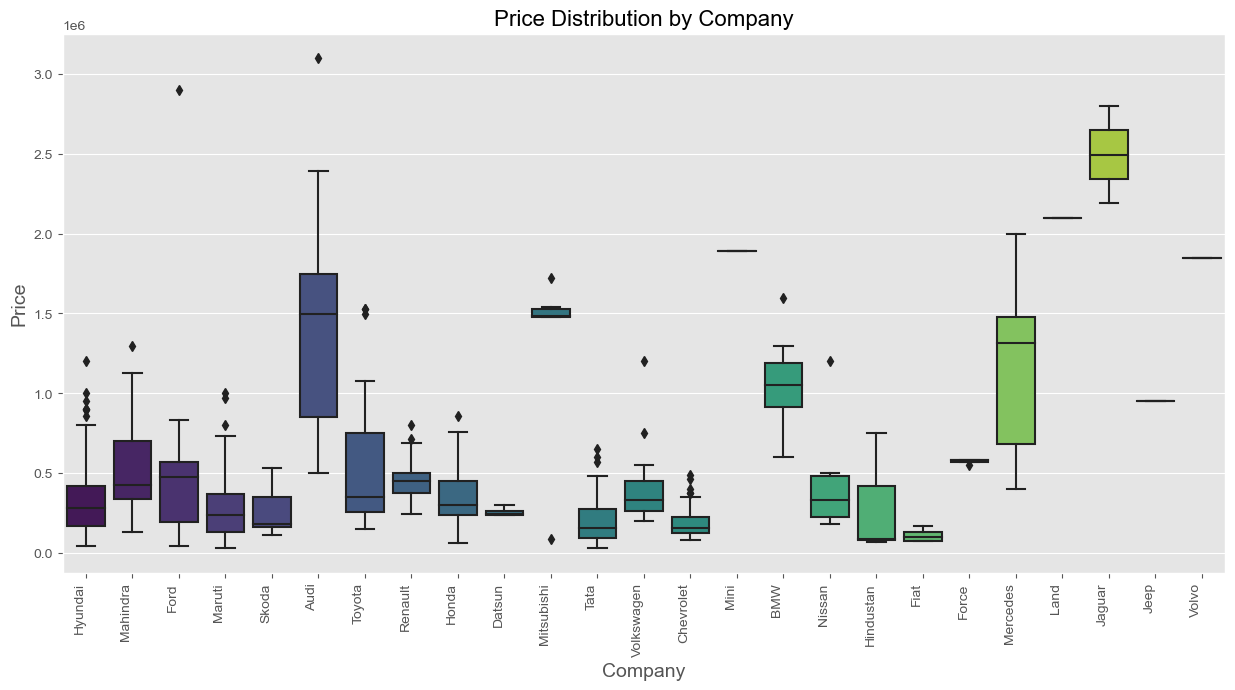

In [24]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(x='company', y='Price', data=data, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_title('Price Distribution by Company', fontsize=16)
ax.set_xlabel('Company', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
sns.set(style='whitegrid')
plt.xticks(rotation = 90)
plt.show()


### Investigating the correlation between Year and Price

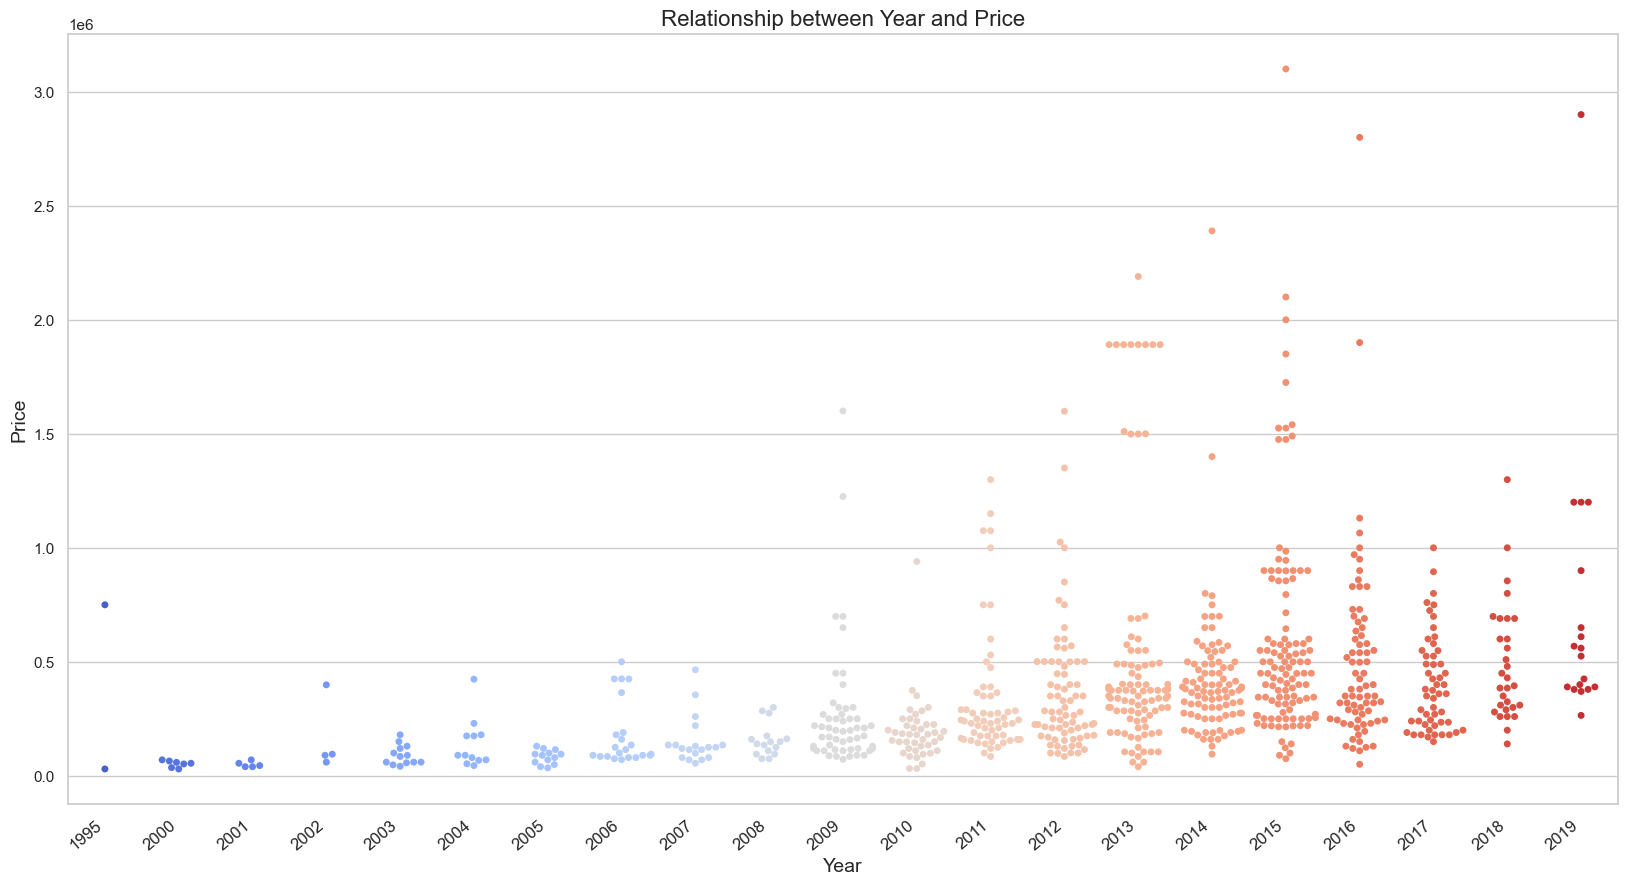

In [25]:
plt.figure(figsize=(20, 10))
ax = sns.swarmplot(x='year', y='Price', data=data, palette='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Relationship between Year and Price', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
sns.set(style='whitegrid')
plt.show()


### Investigating the correlation between kms_driven and Price

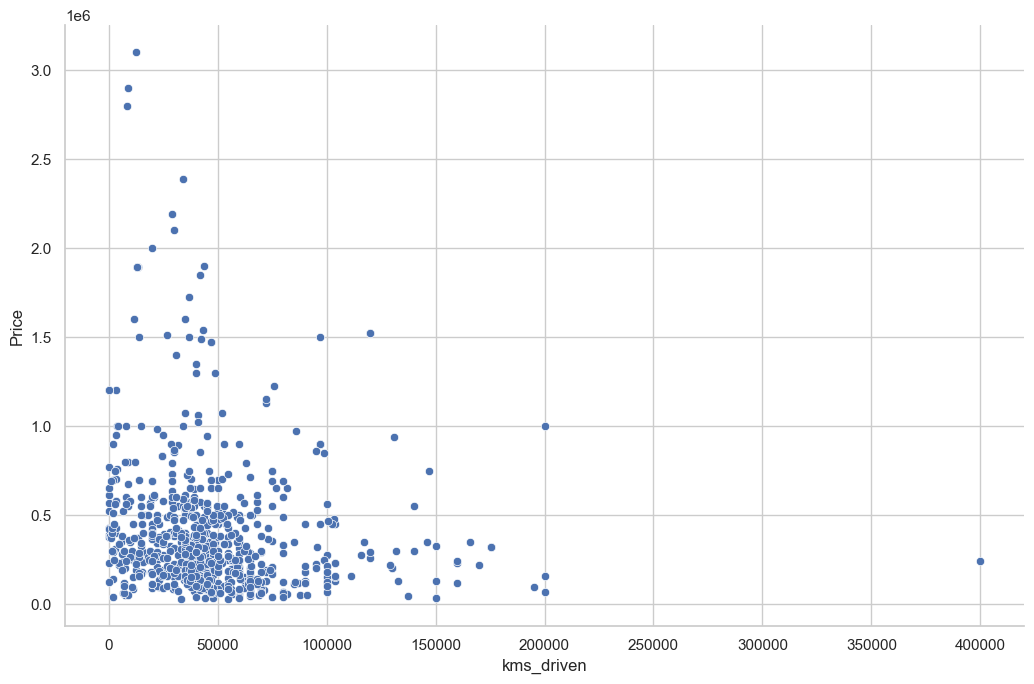

In [26]:
sns.relplot(x='kms_driven',y='Price',data=data,height=7,aspect=1.5)

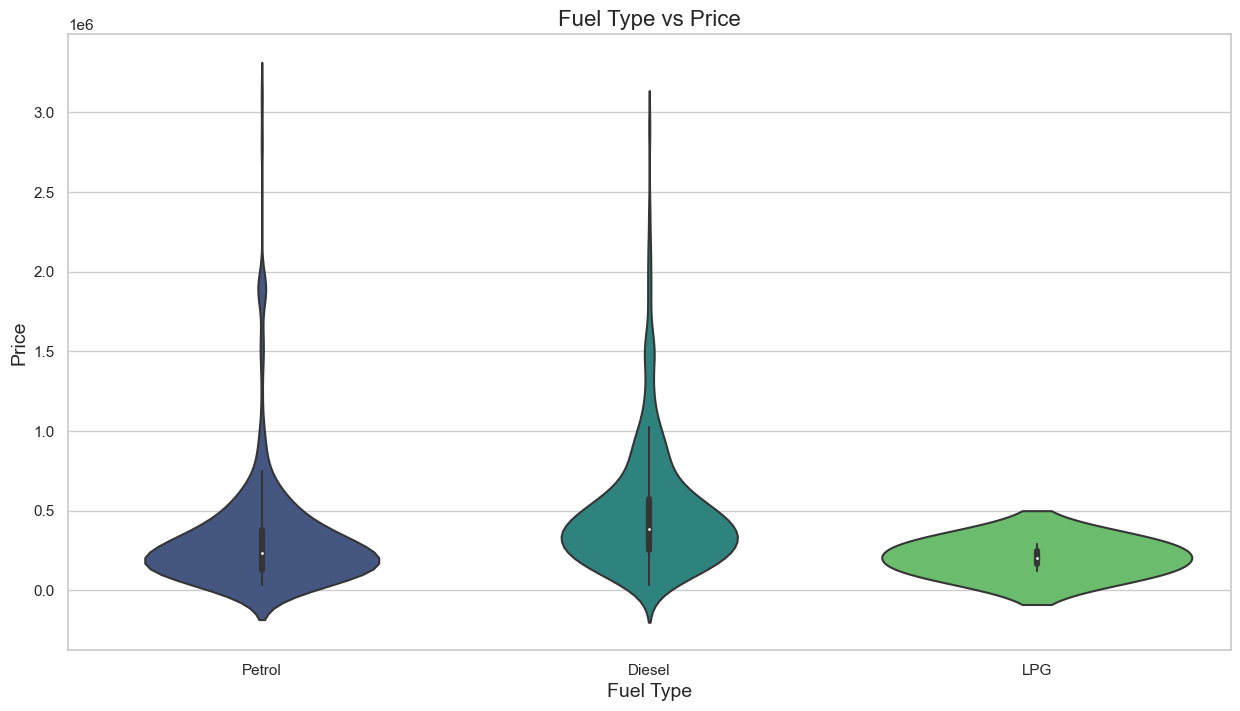

In [27]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='fuel_type', y='Price', data=data, palette='viridis')
plt.title('Fuel Type vs Price', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

### Relationship between Price with FuelType, Year and Company

<Figure size 1500x800 with 0 Axes>

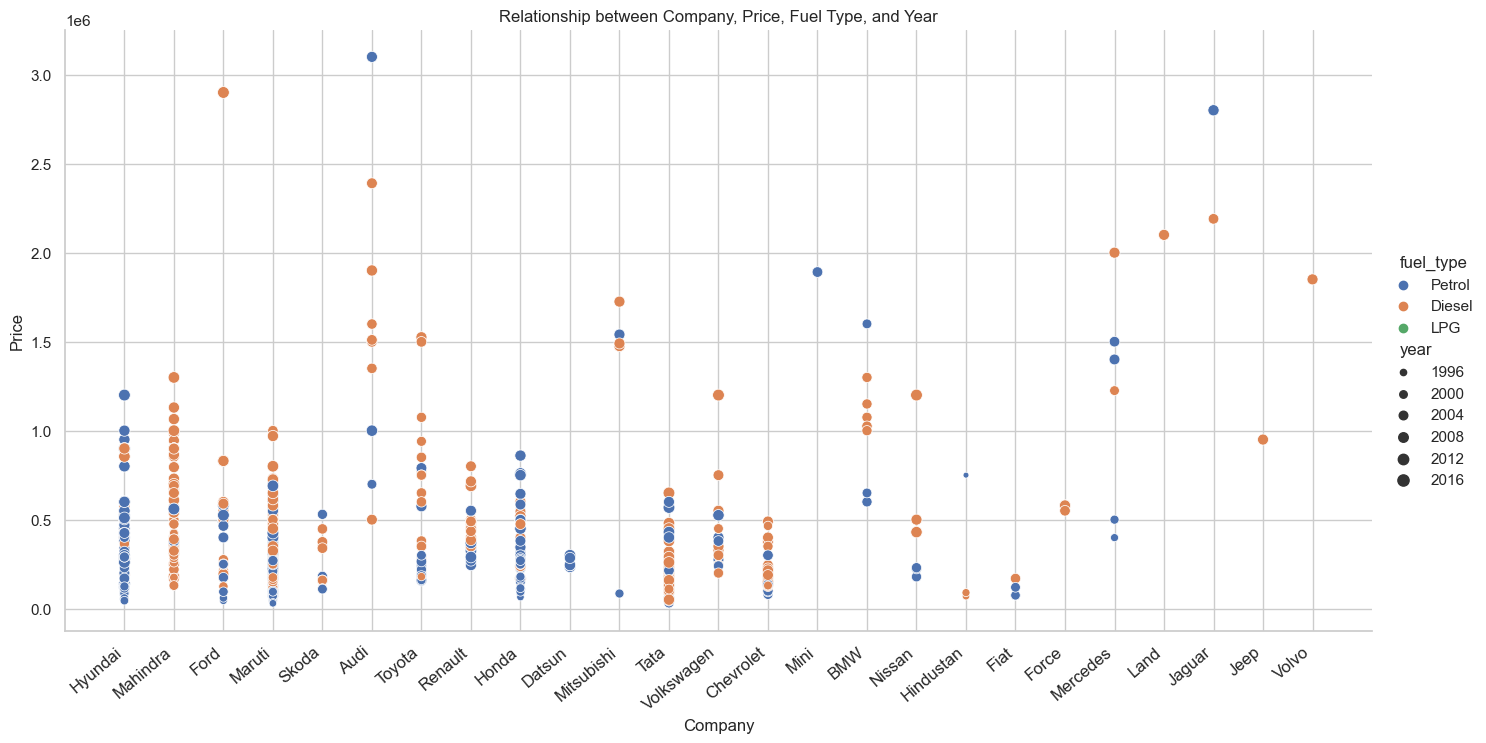

In [28]:
plt.figure(figsize=(15, 8))
ax = sns.relplot(x='company', y='Price', data=data, hue='fuel_type', size='year', height=7, aspect=2)
ax.set_xticklabels(rotation=40, ha='right', fontsize=12)
ax.set(title='Relationship between Company, Price, Fuel Type, and Year', xlabel='Company', ylabel='Price')
plt.show()

In [29]:
numeric_cols = data.select_dtypes(['int32']).keys()
numeric_cols

Index(['year', 'Price', 'kms_driven'], dtype='object')

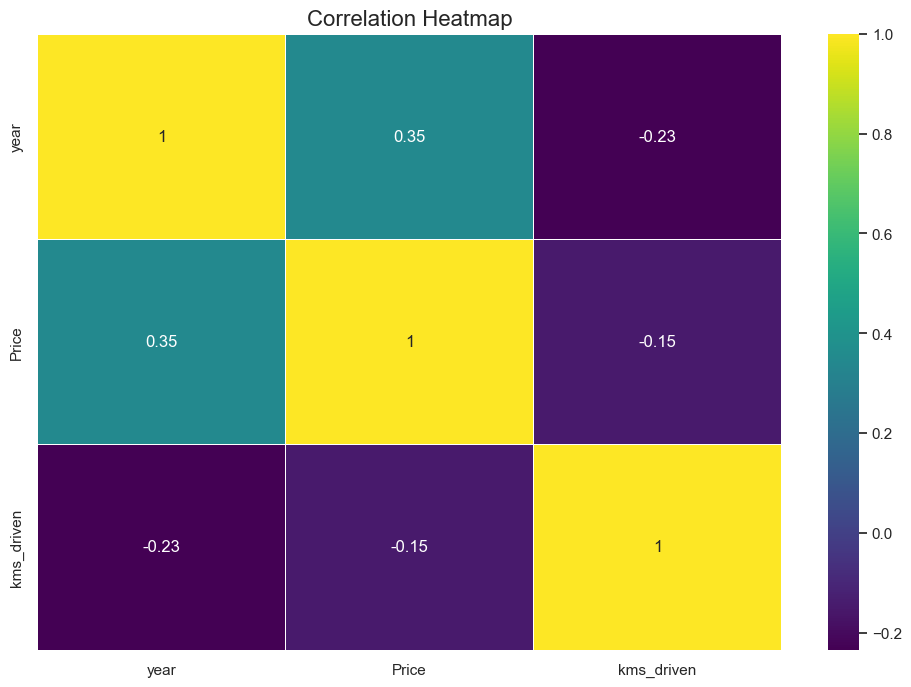

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


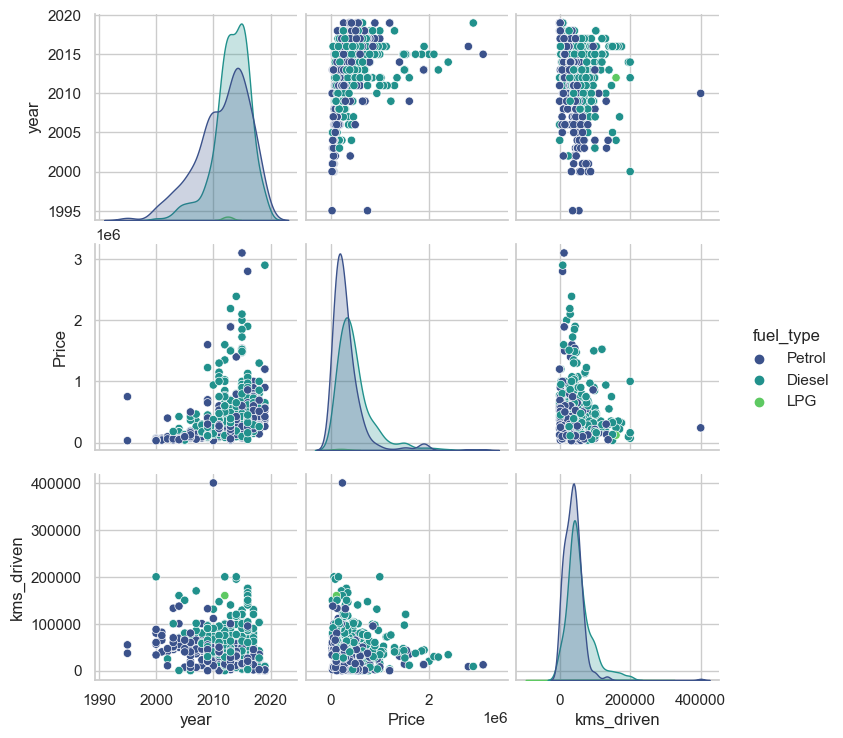

In [31]:
sns.pairplot(data, hue='fuel_type', palette='viridis')
plt.show()

### Data Selection for Price Prediction Model

In [33]:
X=data[['name','company','year','kms_driven','fuel_type']]
y=data['Price']

In [48]:
X.shape

(815, 5)

In [35]:
y.shape

(815,)

### Applying Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#### Creating an OneHotEncoder object to contain all the possible categories

In [42]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(X[['name', 'company', 'fuel_type']])

# Column Transformer
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)

#### Linear Regression Model

In [43]:
lr=LinearRegression()

#### Making a pipeline

In [44]:
pipe = make_pipeline(column_trans, lr)

# Split data and evaluate
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

# Find the best random state
best_random_state = np.argmax(scores)
best_score = scores[best_random_state]

# Example prediction
example_prediction = pipe.predict(pd.DataFrame(columns=X_test.columns,
                                               data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5)))

# Final model with the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=best_random_state)
pipe.fit(X_train, y_train)
final_y_pred = pipe.predict(X_test)
final_r2_score = r2_score(y_test, final_y_pred)

In [45]:
final_r2_score

0.8991139955370199

**Recommended to use joblib for serializing scikit-learn models, as it is more efficient for objects with large numerical arrays**

In [47]:
from joblib import dump, load

# Saving trained pipeline
model_filename = 'LinearRegressionModel.joblib'
dump(pipe, model_filename)

# Loading the saved model
loaded_pipe = load(model_filename)

# Using the loaded model for predictions
example_prediction = loaded_pipe.predict(pd.DataFrame(columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'],
                                                      data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5)))

example_prediction

array([456734.91673802])